In [14]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cartopy.crs as ccrs
import plotly.express as px

# Load the GeoJSON files for each region
gdf_Northern = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Spatial\ratio_total\Northern\hex_cost_components.geojson')
gdf_Central = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Spatial\ratio_total\Central\hex_cost_components.geojson')
gdf_Southern = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Spatial\ratio_total\Southern\hex_cost_components.geojson')


# 1 Min Cost Hexagon

In [15]:
# Find the hexagon with the minimum production cost for each region
min_hex_Northern = gdf_Northern.loc[gdf_Northern['Northern pipeline production cost'].idxmin()]
min_hex_Central = gdf_Central.loc[gdf_Central['Central pipeline production cost'].idxmin()]
min_hex_Southern = gdf_Southern.loc[gdf_Southern['Southern pipeline production cost'].idxmin()]

# If you had a post-Northern dataset:
# min_hex_post_Northern = gdf_post_Northern.loc[gdf_post_Northern['Northern pipeline production cost'].idxmin()]
provinces = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Laos_specific\Data\provinces_laos.geojson')


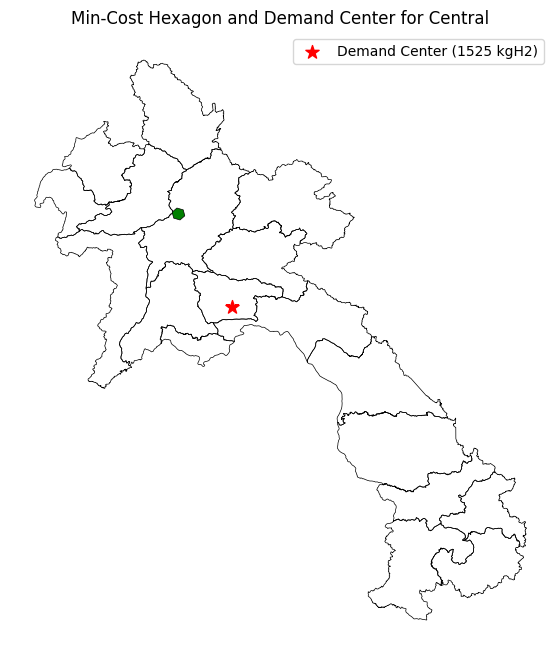

In [51]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from shapely.geometry import Point, LineString
import geopandas as gpd

def plot_min_cost_hexagon_with_demand(hexagon, provinces, demand_center_lat, demand_center_lon, demand_kg, region, save_path):
    """
    Plots the min-cost hexagon for a specific region, province borders, and the demand center with demand information.
    
    Parameters:
    - hexagon: The GeoSeries of the min-cost hexagon.
    - provinces: GeoDataFrame for province boundaries.
    - demand_center_lat: Latitude of the demand center.
    - demand_center_lon: Longitude of the demand center.
    - demand_kg: The demand in kilograms of hydrogen.
    - region: The region being visualized.
    - save_path: File path to save the PNG image.
    """
    crs = ccrs.PlateCarree()
    geo_crs = "EPSG:4326"  # Assuming WGS84

    # Convert the hexagon geometry to a GeoSeries and set CRS
    hexagon_geo = gpd.GeoSeries([hexagon['geometry']], crs=geo_crs)

    fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': crs})
    ax.set_axis_off()

    # Plot the province boundaries
    provinces.to_crs(crs.proj4_init).plot(
        ax=ax, color='none', edgecolor='black', linewidth=0.5)

    # Plot the min-cost hexagon in green
    hexagon_geo.to_crs(crs.proj4_init).plot(
        ax=ax, color='green', edgecolor='black', linewidth=0.5)

    # Plot the demand center
    demand_center = gpd.GeoSeries([Point(demand_center_lon, demand_center_lat)], crs=geo_crs)
    demand_center.to_crs(crs.proj4_init).plot(
        ax=ax, color='red', marker='*', markersize=100, label=f'Demand Center ({demand_kg} kgH2)')

    plt.legend()
    plt.title(f"Min-Cost Hexagon and Demand Center for {region}")
    plt.show()

    # Save the figure (uncomment the following lines to save)
    fig.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.close(fig)

# Example usage for the Northern region
plot_min_cost_hexagon_with_demand(
    hexagon=min_hex_Central,
    provinces=provinces, 
    demand_center_lat=18.722583, 
    demand_center_lon=103.116514, 
    demand_kg=1525, 
    region='Central',
    save_path='ratio_total/visualisation/min_cost_hexagon_central.png'
)


# 2 Geospatial Visualisation

### 2.1 Show individually

In [17]:
import geopandas as gpd

# Load the GeoJSON files for each region
gdf_Northern = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Spatial\ratio_total\Northern\hex_cost_components.geojson')
gdf_Central = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Spatial\ratio_total\Central\hex_cost_components.geojson')
gdf_Southern = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Spatial\ratio_total\Southern\hex_cost_components.geojson')

# Find the min-cost hexagon in each region
min_hex_Northern = gdf_Northern.loc[gdf_Northern['Northern pipeline production cost'].idxmin()]
min_hex_Central = gdf_Central.loc[gdf_Central['Central pipeline production cost'].idxmin()]
min_hex_Southern = gdf_Southern.loc[gdf_Southern['Southern pipeline production cost'].idxmin()]

# If you had a post-Northern dataset:
# min_hex_post_Northern = gdf_post_Northern.loc[gdf_post_Northern['Northern pipeline production cost'].idxmin()]


In [26]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from shapely.geometry import Point, LineString

def plot_yearly_min_cost_hexagon_with_demand(hexagon, provinces, demand_center_lat, demand_center_lon, demand_kg, year, save_path):
    """
    Plots the min-cost hexagon for a specific year, province borders, and the demand center with demand information.
    
    Parameters:
    - hexagon: The GeoSeries of the min-cost hexagon.
    - provinces: GeoDataFrame for province boundaries.
    - demand_center_lat: Latitude of the demand center.
    - demand_center_lon: Longitude of the demand center.
    - demand_kg: The demand in kilograms of hydrogen.
    - year: The year being visualized.
    - save_path: File path to save the PNG image.
    """
    crs = ccrs.PlateCarree()
    geo_crs = "EPSG:4326"  # Assuming WGS84

    # Convert the hexagon geometry to a GeoSeries and set CRS
    hexagon_geo = gpd.GeoSeries([hexagon['geometry']], crs=geo_crs)

    fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': crs})
    ax.set_axis_off()

    # Plot the province boundaries
    provinces.to_crs(crs.proj4_init).plot(
        ax=ax, color='none', edgecolor='black', linewidth=0.5)


    # Plot the min-cost hexagon in green
    hexagon_geo.to_crs(crs.proj4_init).plot(
        ax=ax, color='green', edgecolor='black', linewidth=0.5)

    # Plot the demand center
    demand_center = gpd.GeoSeries([Point(demand_center_lon, demand_center_lat)], crs=geo_crs)
    demand_center.to_crs(crs.proj4_init).plot(
        ax=ax, color='red', marker='*', markersize=100, label=f'Demand Center ({demand_kg} kgH2)')

    plt.legend()
    plt.title(f"Min-Cost Hexagon and Demand Center for {year}")
    plt.show()

    # Save the figure
    fig.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.close(fig)


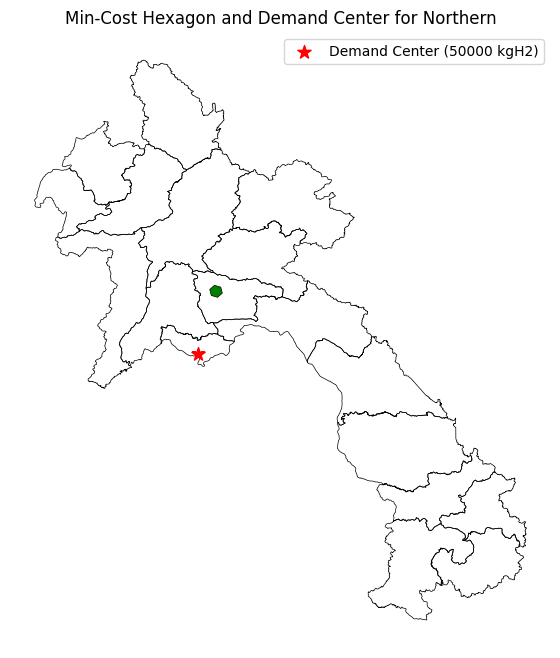

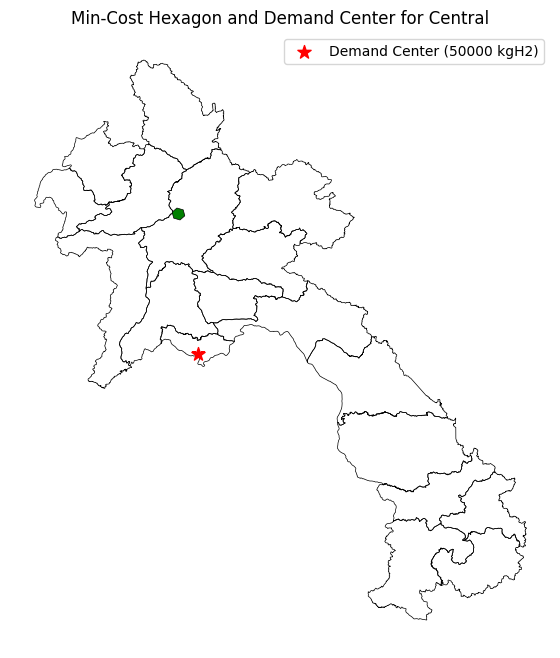

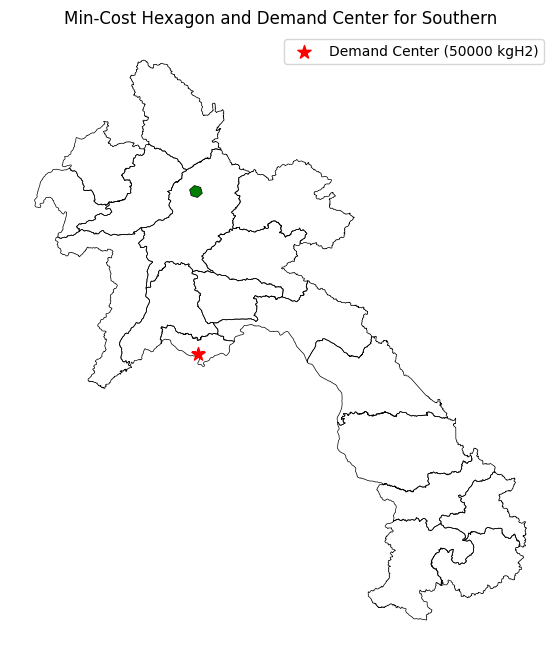

In [27]:
import geopandas as gpd

# Load the province boundaries GeoDataFrame
provinces = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Laos_specific\Data\provinces_laos.geojson')

# Example demand center coordinates and hydrogen demand
demand_center_lat, demand_center_lon = 18.0, 102.6  # Replace with actual coordinates
demand_kg = 50000  # Replace with actual demand in kg

# Plot and save for each region
plot_min_cost_hexagon_with_demand(min_hex_Northern, provinces, demand_center_lat, demand_center_lon, demand_kg, 'Northern', 'ratio_total/visualisation/min_cost_hexagon_Northern.png')
plot_min_cost_hexagon_with_demand(min_hex_Central, provinces, demand_center_lat, demand_center_lon, demand_kg, 'Central', 'ratio_total/visualisation/min_cost_hexagon_Central.png')
plot_min_cost_hexagon_with_demand(min_hex_Southern, provinces, demand_center_lat, demand_center_lon, demand_kg, 'Southern', 'ratio_total/visualisation/min_cost_hexagon_Southern.png')

# If you had a post-Northern dataset, you could also plot it similarly:
# plot_min_cost_hexagon_with_demand(min_hex_post_Northern, provinces, demand_center_lat, demand_center_lon, demand_kg, 'Post-Northern', 'min_cost_hexagon_post_Northern.png')


### 2.3 Top 100

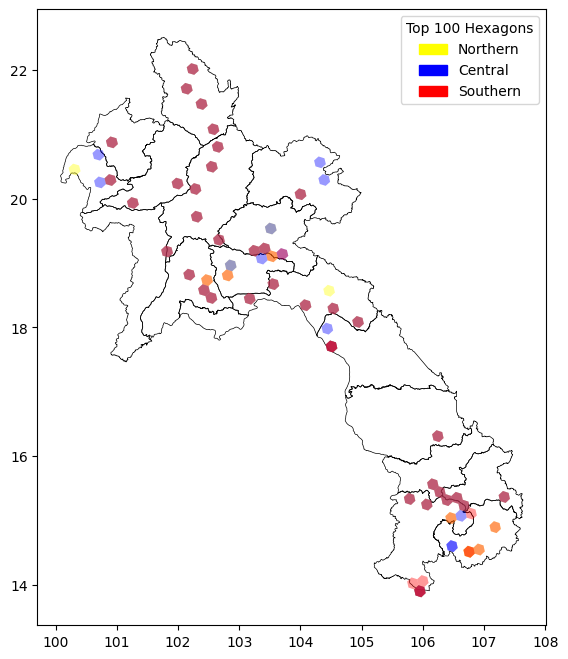

In [54]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Load the GeoJSON files for each region
gdf_Northern = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Spatial\ratio_total\Northern\hex_cost_components.geojson')
gdf_Central = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Spatial\ratio_total\Central\hex_cost_components.geojson')
gdf_Southern = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Spatial\ratio_total\Southern\hex_cost_components.geojson')


transport = 'trucking'
cost = 'production'
x = 50
# Get the top 100 hexagons by total cost for each region
top_100_Northern = gdf_Northern.nsmallest(x, f'Northern {transport} {cost} cost')
top_100_Central = gdf_Central.nsmallest(x, f'Central {transport} {cost} cost')
top_100_Southern = gdf_Southern.nsmallest(x, f'Southern {transport} {cost} cost')

# Load the provinces GeoDataFrame
provinces = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Laos_specific\Data\provinces_laos.geojson')

# Define colors for each region
colors = {
    'Northern': 'yellow',
    'Central': 'blue',
    'Southern': 'red'
}

# Plot all top 100 hexagons on the same map
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the provinces
provinces.to_crs(gdf_Northern.crs).plot(ax=ax, color='none', edgecolor='black', linewidth=0.5)

# Plot each region's top 100 hexagons with different colors
top_100_Northern.plot(ax=ax, color=colors['Northern'], label='Northern', alpha=0.4)
top_100_Central.plot(ax=ax, color=colors['Central'], label='Central', alpha=0.4)
top_100_Southern.plot(ax=ax, color=colors['Southern'], label='Southern', alpha=0.4)

# Manually create the legend using Patches
legend_patches = [
    Patch(color=colors['Northern'], label='Northern'),
    Patch(color=colors['Central'], label='Central'),
    Patch(color=colors['Southern'], label='Southern')
]

plt.legend(handles=legend_patches, title="Top 100 Hexagons")
# plt.title('Top 100 Hexagons Across Regions with Provincial Borders')
plt.show()


MovieWriter imagemagick unavailable; using Pillow instead.


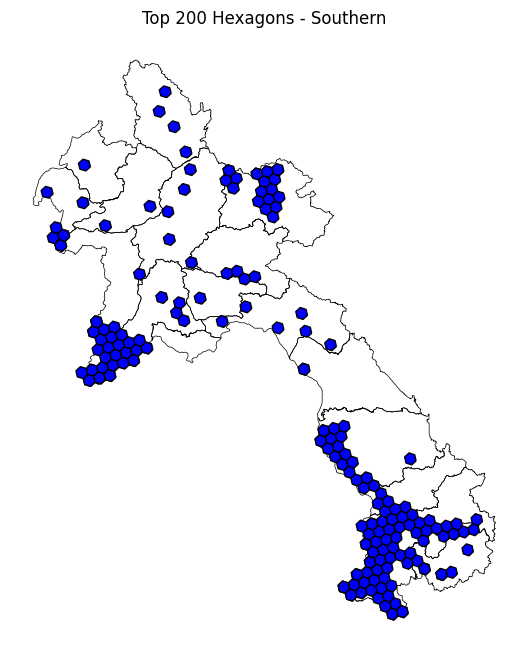

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Load the GeoJSON files for each region
gdf_Northern = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Spatial\ratio_total\Northern\hex_cost_components.geojson')
gdf_Central = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Spatial\ratio_total\Central\hex_cost_components.geojson')
gdf_Southern = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Spatial\ratio_total\Southern\hex_cost_components.geojson')

# Get the top 'x' hexagons by total cost for each region
x = 200
transport = 'trucking'
top_100_Northern = gdf_Northern.nsmallest(x, f'Northern {transport} total cost')
top_100_Central = gdf_Central.nsmallest(x, f'Central {transport} total cost')
top_100_Southern = gdf_Southern.nsmallest(x, f'Southern {transport} total cost')

# Load the provinces GeoDataFrame
provinces = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Laos_specific\Data\provinces_laos.geojson')

# Combine all data into a dictionary for easy access
hexagons_per_region = {
    'Northern': top_100_Northern,
    'Central': top_100_Central,
    'Southern': top_100_Southern,
}

# Initialize the figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Function to update the plot for each region
def update(region):
    ax.clear()  # Clear the previous frame
    
    # Plot the province boundaries again
    provinces.to_crs(gdf_Northern.crs).plot(ax=ax, color='none', edgecolor='black', linewidth=0.5)
    
    # Plot the top hexagons for the current region
    hexagons_per_region[region].plot(ax=ax, color='blue', edgecolor='black')
    
    # Set the title for the current region
    ax.set_title(f'Top {x} Hexagons - {region}')
    ax.set_axis_off()

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=hexagons_per_region.keys(), repeat=True)

# Save the animation as a GIF or MP4 file
ani.save('top_100_hexagons_over_regions.gif', writer='imagemagick', fps=0.8)

# Or, to display inline (e.g., in a Jupyter notebook)
plt.show()


## Violin plot

In [35]:
import geopandas as gpd
import pandas as pd
import plotly.express as px

# Load the GeoJSON files for Northern, Central, and Southern regions
gdf_Northern = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Spatial\ratio_total\Northern\hex_cost_components.geojson')
gdf_Central = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Spatial\ratio_total\Central\hex_cost_components.geojson')
gdf_Southern = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Spatial\ratio_total\Southern\hex_cost_components.geojson')

# Create a DataFrame for each region
df_Northern = pd.DataFrame({
    'Region': 'Northern',
    'Cost': gdf_Northern['Northern pipeline total cost']
})

df_Central = pd.DataFrame({
    'Region': 'Central',
    'Cost': gdf_Central['Central pipeline total cost']
})

df_Southern = pd.DataFrame({
    'Region': 'Southern',
    'Cost': gdf_Southern['Southern pipeline total cost']
})

# Combine the data for all regions into one DataFrame
violin_data = pd.concat([df_Northern, df_Central, df_Southern], ignore_index=True)

# Create the violin plot with Plotly Express
fig = px.violin(violin_data, x='Region', y='Cost', box=True, points='all', color_discrete_sequence=['black'])

# Customize the layout with a cleaner design
fig.update_layout(
    xaxis_title="Region",
    yaxis_title="Total Cost ($/kg)",
    xaxis_title_font=dict(size=18),
    yaxis_title_font=dict(size=18),
    xaxis=dict(
        tickfont=dict(size=16),
        showgrid=True,
        gridcolor='lightgray'
    ),
    yaxis=dict(
        tickfont=dict(size=16),
        showgrid=True,
        gridcolor='lightgray',
        gridwidth=1,
        range=[0, 25],  # Adjust the y-axis limit based on your data
        nticks=20
    ),
    plot_bgcolor='white',
    paper_bgcolor='white',
    showlegend=False  # Remove the legend for clarity
)

# Show the plot
fig.show()


In [52]:
import geopandas as gpd
import pandas as pd
import plotly.graph_objects as go

# Load the GeoJSON files for Northern, Central, and Southern regions
gdf_Northern = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Spatial\ratio_total\Northern\hex_cost_components.geojson')
gdf_Central = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Spatial\ratio_total\Central\hex_cost_components.geojson')
gdf_Southern = gpd.read_file(r'C:\Users\lukas\OneDrive - Imperial College London\0_Thesis\0relevant_repositories\GeoH2 Case Study Laos\Resources\0Spatial\ratio_total\Southern\hex_cost_components.geojson')

# Create a DataFrame for each region and each transport mode (Trucking and Pipeline)
df_Northern_trucking = pd.DataFrame({
    'Region': 'Northern',
    'Cost': gdf_Northern['Northern trucking total cost'],
    'Transport': 'Trucking'
})

df_Northern_pipeline = pd.DataFrame({
    'Region': 'Northern',
    'Cost': gdf_Northern['Northern pipeline total cost'],
    'Transport': 'Pipeline'
})

df_Central_trucking = pd.DataFrame({
    'Region': 'Central',
    'Cost': gdf_Central['Central trucking total cost'],
    'Transport': 'Trucking'
})

df_Central_pipeline = pd.DataFrame({
    'Region': 'Central',
    'Cost': gdf_Central['Central pipeline total cost'],
    'Transport': 'Pipeline'
})

df_Southern_trucking = pd.DataFrame({
    'Region': 'Southern',
    'Cost': gdf_Southern['Southern trucking total cost'],
    'Transport': 'Trucking'
})

df_Southern_pipeline = pd.DataFrame({
    'Region': 'Southern',
    'Cost': gdf_Southern['Southern pipeline total cost'],
    'Transport': 'Pipeline'
})

# Combine the data for all regions and transport types into one DataFrame
violin_data = pd.concat([df_Northern_trucking, df_Northern_pipeline, 
                         df_Central_trucking, df_Central_pipeline, 
                         df_Southern_trucking, df_Southern_pipeline], ignore_index=True)

# Create the figure
fig = go.Figure()

# Add traces for Trucking (left side, negative)
fig.add_trace(go.Violin(x=violin_data['Region'][violin_data['Transport'] == 'Trucking'],
                        y=violin_data['Cost'][violin_data['Transport'] == 'Trucking'],
                        legendgroup='Trucking', scalegroup='Trucking', name='Trucking',
                        side='negative',
                        line_color='blue', box_visible=True, meanline_visible=True)
             )

# Add traces for Pipeline (right side, positive)
fig.add_trace(go.Violin(x=violin_data['Region'][violin_data['Transport'] == 'Pipeline'],
                        y=violin_data['Cost'][violin_data['Transport'] == 'Pipeline'],
                        legendgroup='Pipeline', scalegroup='Pipeline', name='Pipeline',
                        side='positive',
                        line_color='orange', box_visible=True, meanline_visible=True)
             )

# Update the layout
fig.update_layout(
    title="Split Violin Plot of Hexagon Costs for Trucking and Pipeline by Region",
    title_font=dict(size=20),
    xaxis_title="Region",
    yaxis_title="Total Cost ($/kg)",
    xaxis_title_font=dict(size=18),
    yaxis_title_font=dict(size=18),
    xaxis=dict(
        tickfont=dict(size=16),
        showgrid=True,
        gridcolor='lightgray'
    ),
    yaxis=dict(
        tickfont=dict(size=16),
        showgrid=True,
        gridcolor='lightgray',
        gridwidth=1,
        range=[0, 27],  # Adjust the y-axis limit based on your data
        nticks=20
    ),
    plot_bgcolor='white',
    paper_bgcolor='white',
    # violingap=0.07,  # Gap between violins
    # violinmode='overlay'
)

# Show the plot
fig.show()
